# Import Module


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('titanic-dataset.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observations


## 1.   Total Rows: 891
## 2.   Columns with Missing Data:
  ###   *   Age: 714 non-null out of 891 (177 missing).
  ###  *   Cabin: Only 204 non-null (687 missing, highly incomplete).
  ###  *   Embarked: 889 non-null out of 891 (2 missing).

## 3.   Data Types:
  ###  *   float64: Age, Fare
  ###  *   int64: PassengerId, Survived, Pclass, SibSp, Parch
  ###  *   object: Name, Sex, Ticket, Cabin, Embarked



In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# quick interpretation of the statistical summary

1.   **Survived**: The mean survival rate is about 38.4%, indicating that a minority of passengers survived.
2.   **Pclass**: The average value of 2.31 reflects that many passengers were in the 3rd class, confirming earlier observations.
3.   **Age**: The average passenger age was approximately 29.7 years, with ages ranging from 0.42 (infants) to 80 years. The 25th percentile age is around 20.1, and the 75th percentile is 38, suggesting a broad distribution.

4.   **SibSp and Parch**: Most passengers traveled alone, as both SibSp and Parch have medians of 0 and low means (0.52 for SibSp and 0.38 for Parch).
5.   **Fare**: The average fare was 32.20, but fares varied significantly, with a minimum of 0 and a maximum of 512.33. The 25th and 75th percentiles are 7.91 and 31.00, indicating that most passengers paid lower fares, but a few paid very high prices.



**Data Overview:**
* Missing values in Age, Cabin, and Embarked.
* Data types: float (Age, Fare), int (PassengerId, Survived, etc.), object (Name, Sex, etc.).

**Descriptive Statistics:**

* Survival Rate: ~38.4%
* Pclass: Average ~2.31 (many in 3rd class).
* Age: Average ~29.7 years, range 0.42-80.
* SibSp & Parch: Most passengers traveled alone.
* Fare: Average ~32.20, but significant variation (0-512.33).

**Data Visualizations:**

* Histograms created for Age, Fare, and SibSp.
* They show the distribution of these variables.

# Bar Plots for Categorical Data(Sex, Pclass)

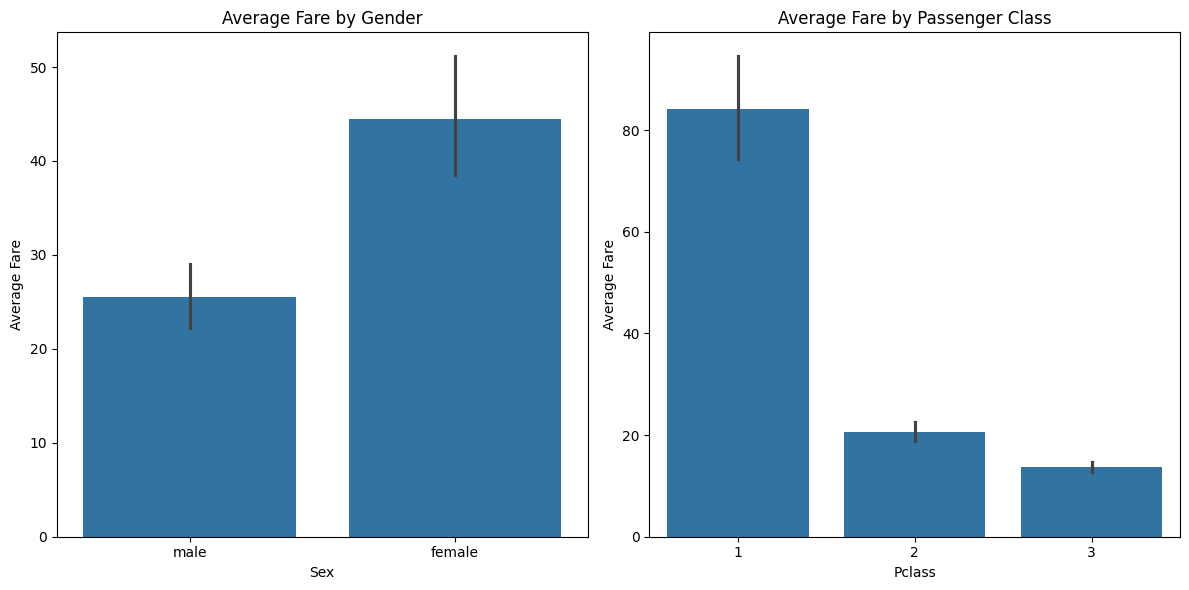

In [ ]:
plt.figure(figsize=(12, 6))
# Plot for Sex
plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Fare', data=df)
plt.title('Average Fare by Gender')
plt.ylabel('Average Fare')

# Plot for Pclass
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Fare', data=df)
plt.title('Average Fare by Passenger Class')
plt.ylabel('Average Fare')

plt.tight_layout()
plt.show()

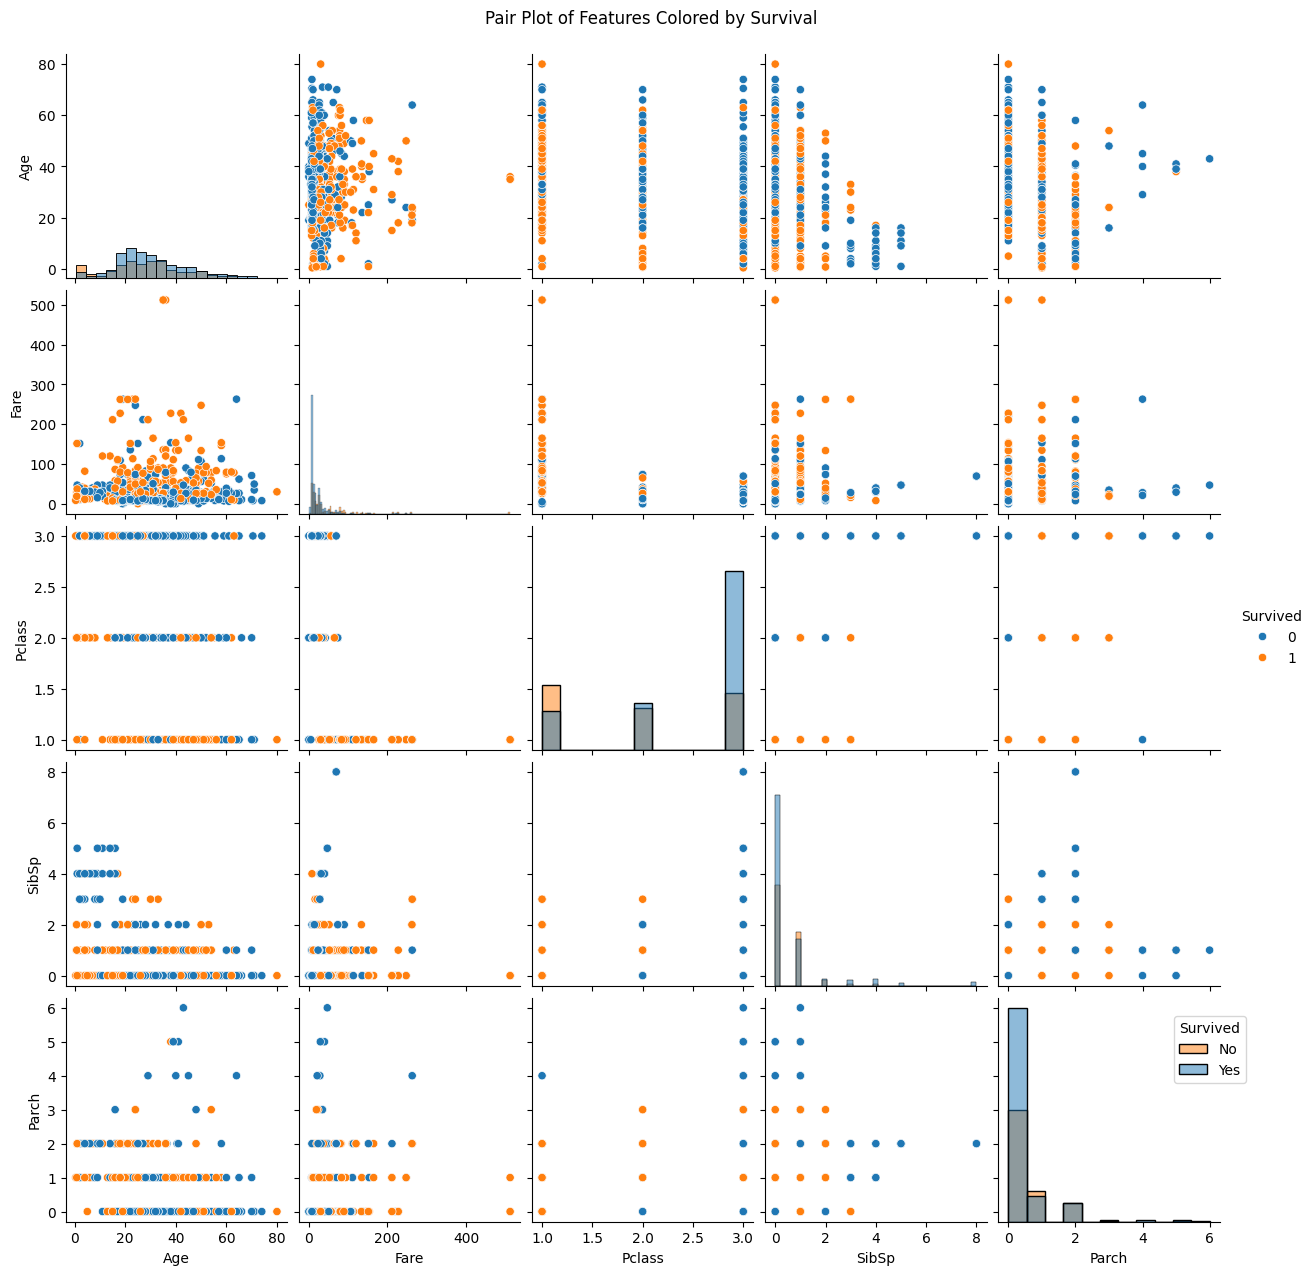

In [ ]:

pairplot_data = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
sns.pairplot(pairplot_data, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot of Features Colored by Survival', y=1.02)
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.show()

# Check the null value

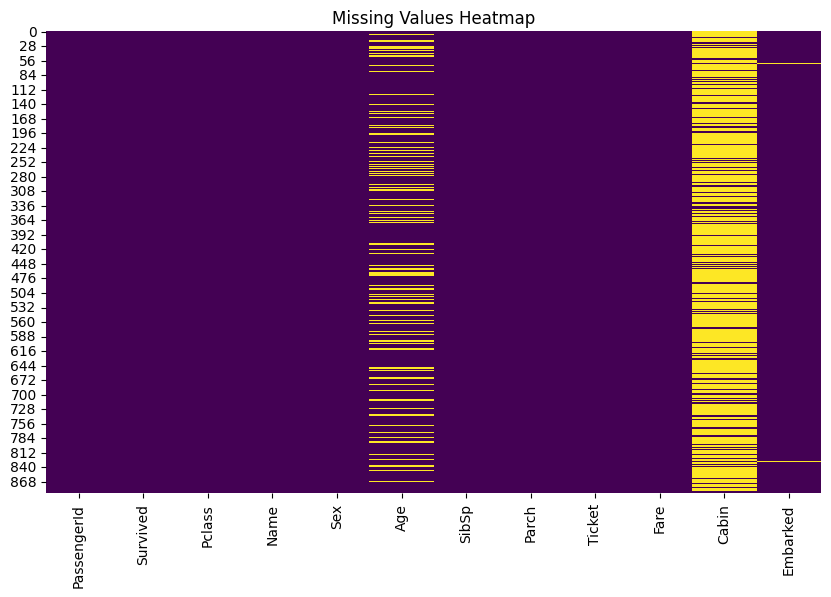

In [ ]:
# Visualize the null values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
df['Name'].value_counts()

,count
Name,
"Braund, Mr. Owen Harris",1
"Boulos, Mr. Hanna",1
"Frolicher-Stehli, Mr. Maxmillian",1
"Gilinski, Mr. Eliezer",1
"Murdlin, Mr. Joseph",1
...,...
"Kelly, Miss. Anna Katherine ""Annie Kate""",1
"McCoy, Mr. Bernard",1
"Johnson, Mr. William Cahoone Jr",1


In [ ]:

def extract_title(name):
  """Extracts the title from a name."""
  try:
    return name.split(',')[1].split('.')[0].strip()
  except IndexError:
    return None

# Apply the function to the 'Name' column to create a new 'Title' column
df['Title'] = df['Name'].apply(extract_title)

# Print the unique titles
print(df['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


- **Mr**: 517 occurrences
- **Miss**: 182 occurrences
- **Mrs**: 125 occurrences

**Mr** is the most common title, followed by **Miss**, and then **Mrs**.



In [ ]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

# Fill 'Embarked' with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df = df.drop(labels=['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

# Feature Engineering

## Creating Age Groups

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])
df['AgeGroup'].value_counts()

,count
AgeGroup,
Adult,730
Teenager,70
Child,69
Senior,22


# Creating Family Size Feature

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['FamilySize'].value_counts()

,count
FamilySize,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [ ]:
def replace_selected_columns_with_int(df, columns):
    for column in columns:
        if column in df.columns and df[column].dtype == 'object':
            try:
                df[column] = df[column].astype(int)
            except ValueError:
                df[column] = df[column].astype('category').cat.codes
    return df

# Example usage:
columns_to_convert = ['Sex', 'Embarked', 'AgeGroup', 'Title']
df = replace_selected_columns_with_int(df, columns_to_convert)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,11,0,1
1,1,1,0,38.0,1,0,71.2833,0,12,0,1
2,1,3,0,26.0,0,0,7.9250,2,8,0,0
3,1,1,0,35.0,1,0,53.1000,2,12,0,1
4,0,3,1,35.0,0,0,8.0500,2,11,0,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, roc_auc_score, precision_score, f1_score, classification_report

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
rfc_y_pred = RFC.predict(X_test)

<ipython-input-51-ea0c5a0ed053>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


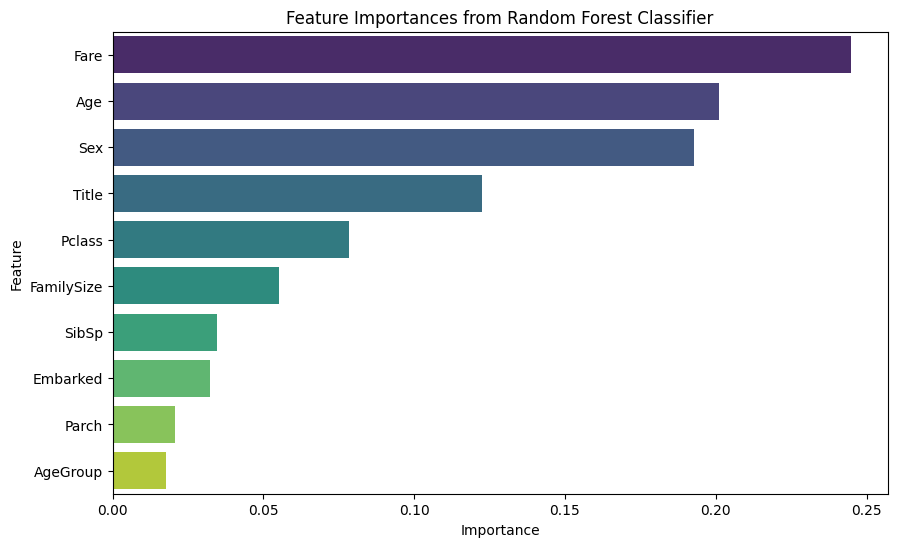

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = RFC.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

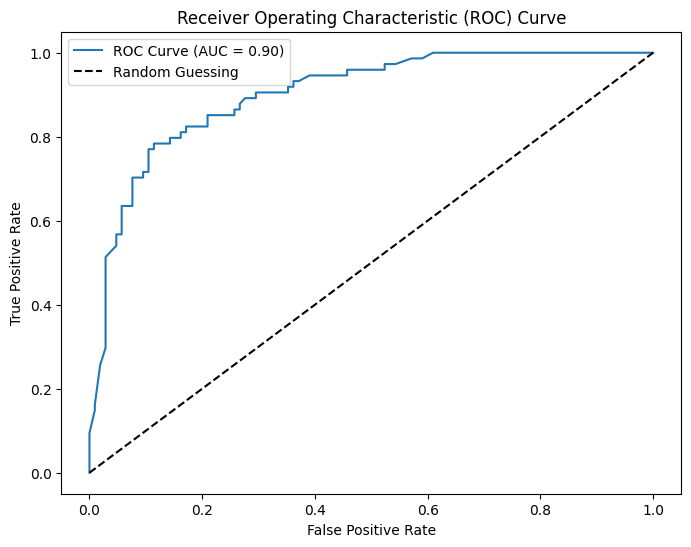

In [ ]:
y_pred_proba = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

accuracy = accuracy_score(y_test, rfc_y_pred)
precision = precision_score(y_test, rfc_y_pred)
recall = recall_score(y_test, rfc_y_pred)
f1 = f1_score(y_test, rfc_y_pred)



# Dropping Low Important Features Got From RFC Model

In [ ]:
df = df.drop(labels=['SibSp', 'Parch', 'AgeGroup', 'Embarked'], axis=1)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFCWithGridSearchCV = RandomForestClassifier(random_state=42)
RFCWithGridSearchCV.fit(X_train, y_train)
y_pred = RFCWithGridSearchCV.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
rocAucScore = roc_auc_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)
recallScore = recall_score(y_test, y_pred)
precisionScore = precision_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)

print(f'Accuracy : {accuracy:.2f}')
print(f'Roc Auc Score : {rocAucScore:.2f}')
print(f'Confusion Matrix : {confusionMatrix}')
print(f'Recall Score : {recallScore:.2f}')
print(f'Precision Score : {precisionScore:.2f}')
print(f'F1 Score : {f1Score:.2f}')

Accuracy : 0.81
Roc Auc Score : 0.81
Confusion Matrix : [[87 18]
 [16 58]]
Recall Score : 0.78
Precision Score : 0.76
F1 Score : 0.77


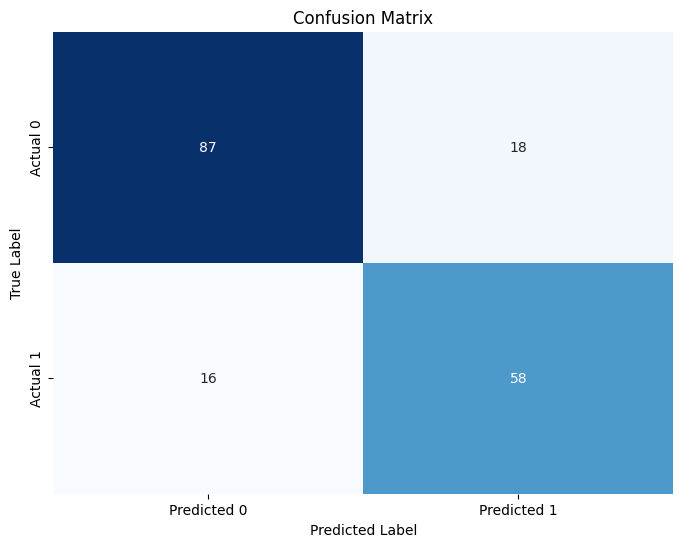

In [ ]:

# Assuming you have y_test and y_pred from your model
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()